# Step 1 : PREPARING DATA

### READING DATA

DATA SET : https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

In [2]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib as mp

In [3]:
# Reading data
df_samples = pd.read_table('Skin_NonSkin.txt', delimiter='\t', dtype = np.int16) # I should check dtype parameter effect , dtype default = np.int64
df_samples.head()

,74,85,123,1
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [4]:
# Renaming column labels
col_list = df_samples.columns.tolist()
df_samples = df_samples.rename(columns = {col_list[0]:"B", col_list[1]:"G", col_list[2]:"R", col_list[3]:"CAT"})
df_samples.head()

,B,G,R,CAT
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [5]:
# Counting number of samples group by their categories
target_count = df_samples['CAT'].value_counts()
target_count.plot(kind='bar', title='Count (CAT)') # if I could normalized it it would be much better
# As the plot shows data is imbalanced

In [6]:
# Removing duplicates
pd.DataFrame.drop_duplicates(df_samples, keep = 'first', inplace = True)
df_samples.head()

,B,G,R,CAT
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
4,69,80,118,1
7,76,87,125,1


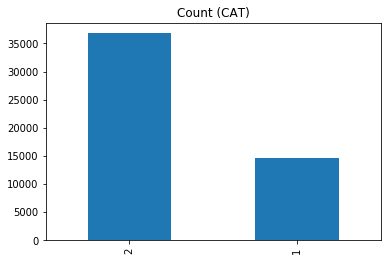

In [7]:
# After removing duplicates check if data is still imbalanced
target_count = df_samples['CAT'].value_counts()
target_count.plot(kind='bar', title='Count (CAT)')
# As the plot shows data is imbalanced

### PREPARING DATA

In [8]:
# Shuffling data
from sklearn import utils
df_samples = utils.shuffle(df_samples, random_state=84)
df_samples.head()

,B,G,R,CAT
9039,144,176,225,1
171930,61,168,71,2
57496,95,74,53,2
110570,206,206,212,2
122554,133,138,107,2


In [9]:
## Checkkk???
df_samples.dtypes

B      int16
G      int16
R      int16
CAT    int16
dtype: object

In [10]:
# Oversampling minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'minority', random_state=84)
Y_train = df_samples['CAT']
X_train = df_samples.drop('CAT', axis='columns')
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

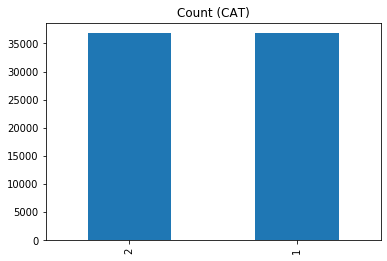

In [11]:
target_count = pd.Series(y_train_res).value_counts()

target_count.plot(kind='bar', title='Count (CAT)')
# Data is balanced now

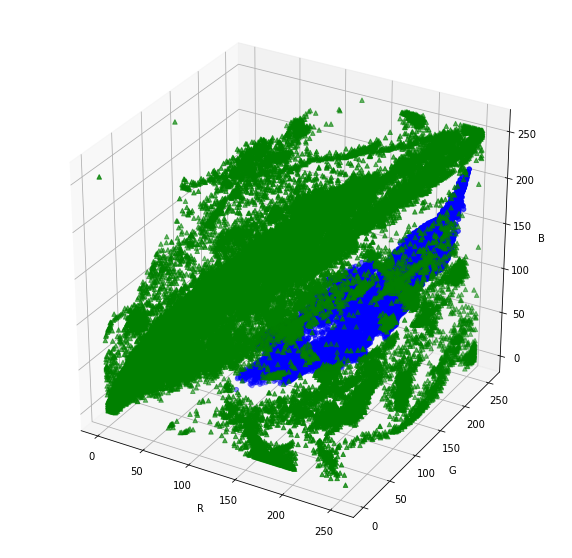

In [12]:
# scattering data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

df_class1 = df_samples[df_samples['CAT'] == 1]
df_class2 = df_samples[df_samples['CAT'] == 2]
ax.scatter(df_class2['R'], df_class2['G'], df_class2['B'], c='g', marker='^')
ax.scatter(df_class1['R'], df_class1['G'], df_class1['B'], c='b', marker='o')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

In [265]:
# Splitting the data set to two parts: train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2)

In [266]:
# #######################################K-Fold Crossvalidation together with hyperparameter tuning by RandomizedSearchCV ################################################
# I used this part of code for k-fold cross validation and hyper parameter tuning 

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV


# # Number of trees in random forest
# n_estimators = np.arange(200, 2000, 10)

# # Number of features to consider at every split
# max_features = ["auto", "sqrt"]

# # Maximum number of levels in tree
# max_depth = np.arange(10, 110, 11)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# clf = RandomForestClassifier()

# # Random search of parameters, using 5 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
# rf_random.fit(x_train, y_train)

# df_cv_results = pd.DataFrame(rf_random.cv_results_)
# mp.pyplot.figure(figsize=(15, 15))
# index = 1

# for parameter, param_range in dict.items(random_grid):
#     cv_param = 'param_'+ parameter
#     df_cv_results = pd.DataFrame(rf_random.cv_results_)[[ cv_param, 'mean_test_score']]
#     df_cv_results = df_cv_results.sort_values(by = cv_param)
#     mp.pyplot.subplot(3,2,index)
#     mp.pyplot.title(cv_param)
#     mp.pyplot.plot(df_cv_results[cv_param], df_cv_results['mean_test_score']) 
#     index += 1

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
y_probas = rf_classifier.fit(x_train, y_train).predict_proba(x_test)

B    0.248890
G    0.263239
R    0.487871
dtype: float64

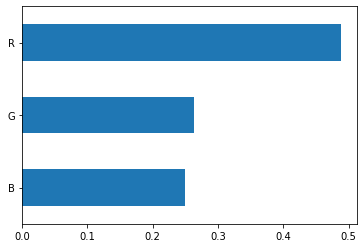

In [268]:
# Feature importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index = X_train.columns)
feature_importance.plot(kind = "barh")

In [269]:
rf_classifier.score(x_test, y_test)

0.9984370752921989

In [270]:
from sklearn.metrics import *

y_pred = rf_classifier.predict(x_test)
f1_score(y_test, y_pred, average = None)

array([0.99844416, 0.99842993])

In [271]:
accuracy_score(y_test, y_pred)

0.9984370752921989

In [272]:
recall_score(y_test, y_pred, average = None)

array([0.99959366, 0.9972726 ])

In [273]:
precision_score(y_test, y_pred, average = None)

array([0.9972973 , 0.99958994])

In [274]:
confusion_matrix(y_test, y_pred)

array([[7380,    3],
       [  20, 7313]])

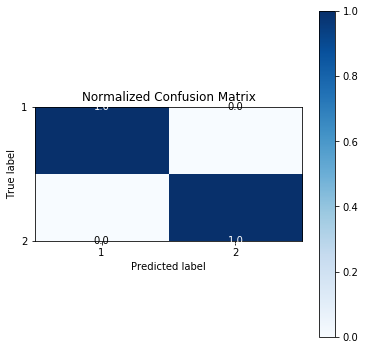

In [278]:
import scikitplot as skplt
import matplotlib.pyplot as plt

confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, true_labels = (1,2), figsize=(6,6), text_fontsize = "medium", normalize=True)
plt.show()

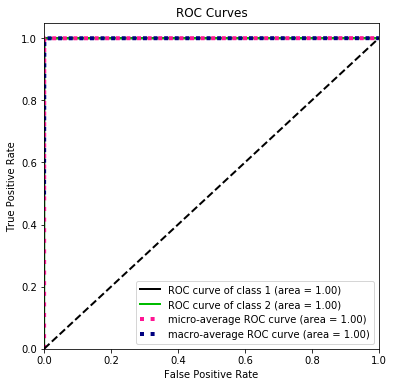

In [277]:
skplt.metrics.plot_roc(y_test, y_probas, figsize=(6,6))